In [156]:
#JAIOSN VICTOR JOSEPH FRANCIS XAVIER- 700743397
#Summer 2023: CS5710_Machine Learning
#In-Class Programming Assignment-2

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
#Programming elements:
#Classification

In [159]:
#1. Pandas

In [160]:
cd /content/drive/MyDrive/Summer 2023/Machine Learning/Programming Assignment 2

/content/drive/MyDrive/Summer 2023/Machine Learning/Programming Assignment 2


In [161]:
#1. Read the provided CSV file ‘data.csv’:
import pandas as pd
df = pd.read_csv('data.csv')     #Reading the csv file from the Google drive
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [162]:
#2. Show the basic statistical description about the data:
df.describe()
 #describe() results

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [163]:
#3. Check if the data has null values:

df.isnull().any()
 #check the table has any null values

Duration    False
Pulse       False
Maxpulse    False
Calories     True
dtype: bool

In [164]:
#3. a) Replace the null values with the mean:
mean=df['Calories'].mean()
df['Calories'].fillna(value=mean, inplace=True)
#Replacing Nan or None values with particular columns mean value

In [165]:
df.isnull().any()

Duration    False
Pulse       False
Maxpulse    False
Calories    False
dtype: bool

In [166]:
#4. Select at least 2 columns & aggregate the data using: min, max, count, mean:
df.aggregate({'Pulse' : ['min', 'max', 'count', 'mean'], 'Maxpulse' : ['min', 'max', 'count', 'mean'],
        'Calories' : ['min', 'max', 'count', 'mean'] })

,Pulse,Maxpulse,Calories
min,80.000000,100.000000,50.300000
max,159.000000,184.000000,1860.400000
count,169.000000,169.000000,169.000000
mean,107.461538,134.047337,375.790244


In [167]:
#5. Filter the dataframe to select the rows with calories values between 500 and 1000:
df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]   # Here '&' operator to filter the dataframe

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


In [168]:
#6. Filter the dataframe to select the rows with calories values > 500 and pulse < 100 :
df[(df['Calories'] > 500) & (df['Pulse'] < 100)]   # Here '&' operator is used to filter the data

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


In [169]:
#7. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”:
df_modified = df[['Duration', 'Pulse', 'Calories']].copy()
 #copy method to create an another data frame with specified columns from the original dataframe.
df_modified

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [170]:
#8. Delete the “Maxpulse” column from the main df dataframe:
df.pop('Maxpulse')
 #pop method is uesd to remove a column from the data frame
df

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0
...,...,...,...
164,60,105,290.8
165,60,110,300.0
166,60,115,310.2
167,75,120,320.4


In [171]:
#9. Convert the datatype of Calories column to int datatype:
df['Calories'] = df['Calories'].astype(int) # Here astype() function converts one data type into another data type
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

<Axes: xlabel='Duration', ylabel='Calories'>

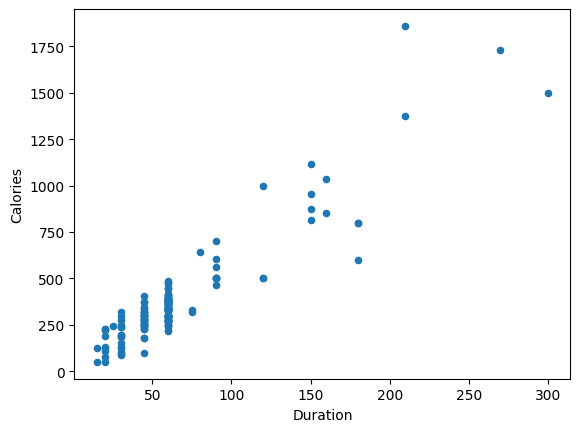

In [172]:
#10. Using pandas create a scatter plot for the two columns (Duration and Calories):
df.plot.scatter(x='Duration', y='Calories')

In [173]:
#2. Scikit-learn

In [174]:
# 1. Implement Naïve Bayes method using scikit-learn library.
#   1. a) Use the glass dataset available in Link also provided in your assignment.

In [175]:
import numpy as np
import pandas as pd
glass = pd.read_csv("glass.csv") #Reading the csv file from the Google drive
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [176]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [177]:
# 1. b) Use train_test_split to create training and testing part.

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_true = train_test_split(glass[::-1], glass['Type'], test_size = 0.2, random_state = 0)

In [179]:
# 2. Evaluate the model on testing part using score and classification_report(y_true, y_pred)

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Gaussian Naive Bayes:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier:

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      0.89      0.94        19
           3       0.00      0.00      0.00         5
           5       0.25      0.50      0.33         2
           6       0.00      0.00      0.00         2
           7       0.46      1.00      0.63         6

    accuracy                           0.77        43
   macro avg       0.45      0.57      0.48        43
weighted avg       0.73      0.77      0.73        43

[[ 9  0  0  0  0  0]
 [ 0 17  0  2  0  0]
 [ 0  0  0  1  0  4]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  0  2]
 [ 0  0  0  0  0  6]]
accuracy is 0.7674418604651163


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
# 1. Implement linear SVM method using scikit library
#   1. a) Use the glass dataset available in Link also provided in your assignment.

In [182]:
import numpy as np
import pandas as pd
glass = pd.read_csv("glass.csv") #Reading the csv file from the Google drive
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [183]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [184]:
#   1. b) Use train_test_split to create training and testing part:

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_true = train_test_split(glass[::-1], glass['Type'], test_size = 0.2, random_state = 0)

In [186]:
# 2. Evaluate the model on testing part using score and classification_report(y_true, y_pred):

In [187]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Support Vector Machine's
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_true))

              precision    recall  f1-score   support

           1       0.21      1.00      0.35         9
           2       0.00      0.00      0.00        19
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6

    accuracy                           0.21        43
   macro avg       0.03      0.17      0.06        43
weighted avg       0.04      0.21      0.07        43

[[ 9  0  0  0  0  0]
 [19  0  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 6  0  0  0  0  0]]
accuracy is 0.20930232558139536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
# Do at least two visualizations to describe or show correlations in the Glass Dataset.

<Axes: xlabel='Type', ylabel='Ca'>

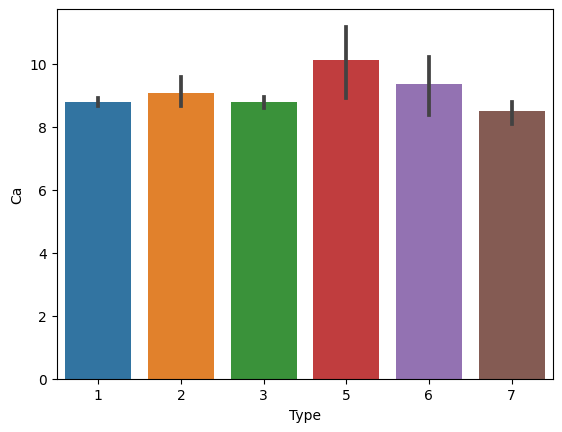

In [193]:
import seaborn as sns   # For Visualisation import seaborn library
import matplotlib.pyplot as plt
sns.barplot(x = glass['Type'], y = glass['Ca'])

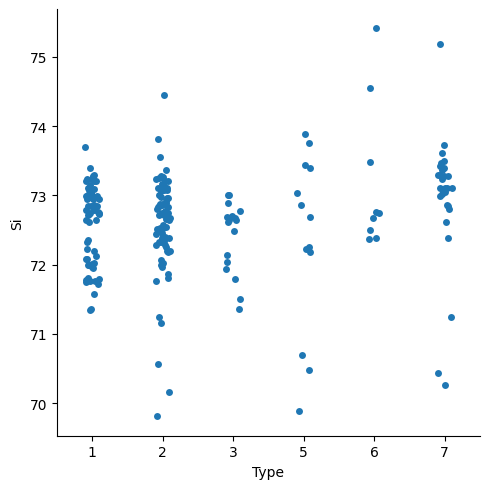

In [194]:
sns.catplot(data=glass, x="Type", y="Si")

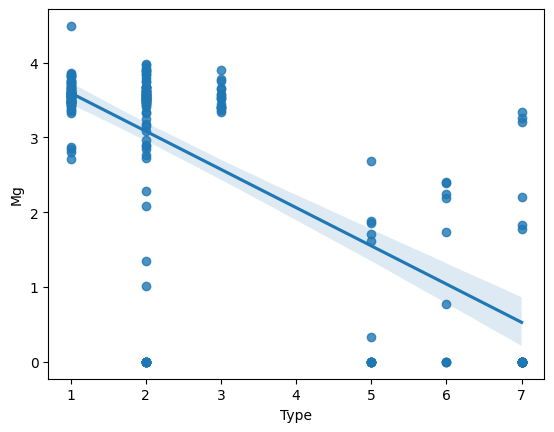

In [191]:
sns.regplot(x="Type", y="Mg", data=glass);